# Intel Image Classification

In [14]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import PIL
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [2]:
data_dir = "C:\\Users\\dennis\\Desktop\\mlprojects\\data\\intel_image\\"
train_dir = data_dir + "train\\"
validation_dir = data_dir + "test\\"

In [3]:
print("Classes are ",end="\n\n")
for i in os.listdir(train_dir):
    print(f"--> {i.capitalize()}")
    

Classes are 

--> Buildings
--> Forest
--> Glacier
--> Mountain
--> Sea
--> Street


In [4]:
def show_class_images(directory):
    j = 1
    for i in os.listdir(directory):
        img_path = directory + i + "\\" + os.listdir(directory + i )[0]
        plt.subplot(1,6,j)
        plt.imshow(imread(img_path))
        plt.title(i.capitalize())
        plt.axis("off")
        j += 1

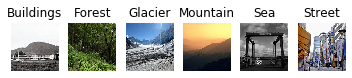

In [5]:
show_class_images(train_dir)

In [6]:
w = 150
h = 150
c = 3

In [7]:
train_gen = ImageDataGenerator(rescale=1/255,
                               rotation_range=40,
                               width_shift_range=0.2, 
                               height_shift_range=0.2,
                               zoom_range=0.2,
                               shear_range=0.2,
                               horizontal_flip=True)

train_datagen = train_gen.flow_from_directory(train_dir,
                                              target_size=(w,h),
                                              class_mode="categorical",
                                              batch_size=32)

Found 14034 images belonging to 6 classes.


In [8]:
validation_gen = ImageDataGenerator(rescale=1/255)

validation_datagen = validation_gen.flow_from_directory(validation_dir,
                                                        target_size=(w,h),
                                                        class_mode="categorical",
                                                        batch_size=32)

Found 3000 images belonging to 6 classes.


In [9]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",
                 input_shape=(w,h,c)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=512,activation="relu"))

model.add(Dense(units=6,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam",
              metrics=["acc"])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [12]:
model.fit_generator(train_datagen,validation_data=validation_datagen,
                    epochs=10)

Epoch 1/10
439/439 [==============================] - 461s 1s/step - loss: 0.6629 - acc: 0.7555 - val_loss: 0.5798 - val_acc: 0.7897
Epoch 2/10
439/439 [==============================] - 471s 1s/step - loss: 0.6321 - acc: 0.7685 - val_loss: 0.5371 - val_acc: 0.8193
Epoch 3/10
439/439 [==============================] - 498s 1s/step - loss: 0.6029 - acc: 0.7778 - val_loss: 0.5596 - val_acc: 0.7973
Epoch 4/10
439/439 [==============================] - 534s 1s/step - loss: 0.5890 - acc: 0.7842 - val_loss: 0.5998 - val_acc: 0.7837
Epoch 5/10
439/439 [==============================] - 486s 1s/step - loss: 0.5761 - acc: 0.7902 - val_loss: 0.5297 - val_acc: 0.8157
Epoch 6/10
439/439 [==============================] - 589s 1s/step - loss: 0.5484 - acc: 0.8009 - val_loss: 0.4943 - val_acc: 0.8350
Epoch 7/10
439/439 [==============================] - 619s 1s/step - loss: 0.5377 - acc: 0.8028 - val_loss: 0.5224 - val_acc: 0.8077
Epoch 8/10
439/439 [==============================] - 551s 1s/step - 

In [22]:
model.metrics_names

['loss', 'acc']

In [28]:
train_datagen.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [21]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,acc,val_loss,val_acc
0,0.662811,0.755522,0.579789,0.789667
1,0.632207,0.768491,0.537074,0.819333
2,0.602447,0.777825,0.559556,0.797333
3,0.589103,0.784167,0.599785,0.783667
4,0.575882,0.790152,0.529682,0.815667


In [23]:
loss_range = list(range(1,len(losses)+1))

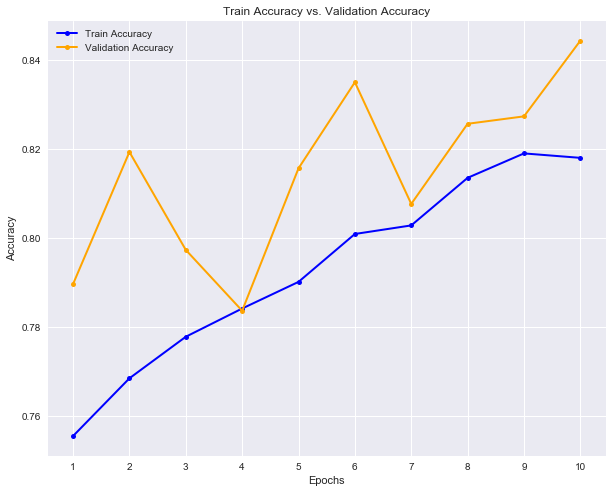

In [37]:
plt.figure(figsize=(10,8))
plt.style.use("seaborn")
plt.plot(loss_range,losses["acc"],color="blue",linewidth=2,marker=".",markersize=10,label="Train Accuracy")
plt.plot(loss_range,losses["val_acc"],color="orange",linewidth=2,marker=".",markersize=10,label="Validation Accuracy")
plt.title("Train Accuracy vs. Validation Accuracy")
plt.xticks(loss_range)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend();

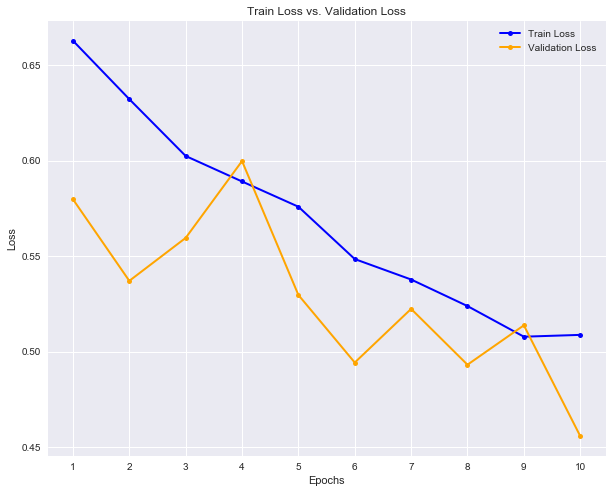

In [39]:
plt.figure(figsize=(10,8))
plt.style.use("seaborn")
plt.plot(loss_range,losses["loss"],color="blue",linewidth=2,marker=".",markersize=10,label="Train Loss")
plt.plot(loss_range,losses["val_loss"],color="orange",linewidth=2,marker=".",markersize=10,label="Validation Loss")
plt.title("Train Loss vs. Validation Loss")
plt.xticks(loss_range)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend();

In [44]:
def make_prediction(img_path):
    
    classes = [i.capitalize() for i in train_datagen.class_indices.keys()]
    img = load_img(img_path,target_size=(w,h))
    img_arr = img_to_array(img)
    pred = np.expand_dims(img_arr,axis=0)
    pred_ind = model.predict(pred)[0].argmax()
    prediction = classes[pred_ind]
    plt.figure(figsize=(8,6))
    plt.imshow(imread(img_path))
    plt.title(f"Prediction is {prediction}")
    plt.axis("off")

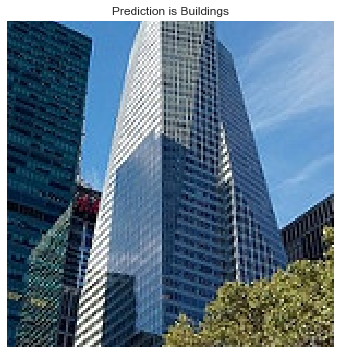

In [57]:
path = "C:\\Users\\dennis\\Desktop\\mlprojects\\data\\intel_image\\pred\\seg_pred\\61.jpg"
make_prediction(path)